In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
data =pd.read_csv('titanic.csv')
data.shape
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


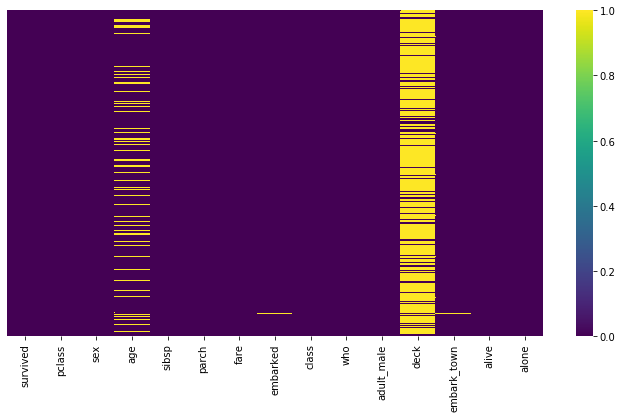

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis') #to check missing data 

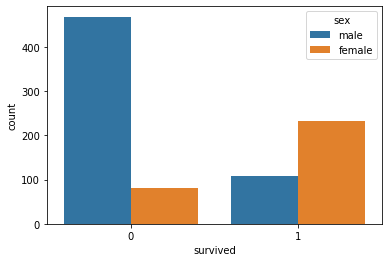

In [24]:
sns.countplot(x='survived',data=data,hue='sex') #most of the male not survived

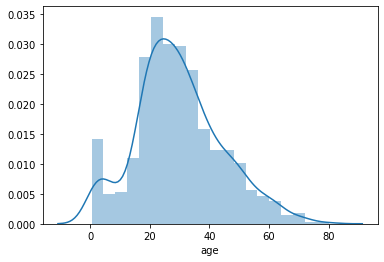

In [19]:
sns.distplot(data['age'].dropna())# most of them were between 20-40

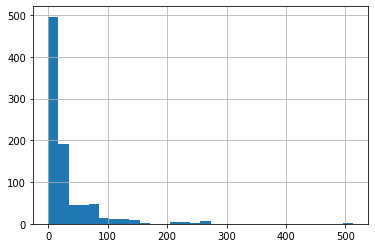

In [22]:
data['fare'].hist(bins=30) #most have bought cheaper tickets

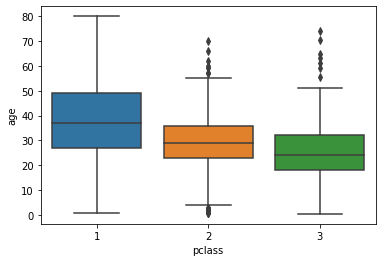

In [27]:
# cleaning data 
sns.boxplot(x='pclass',y='age',data=data)
# first class people have higher age  

In [29]:
# age column has missing values 
#applying function to set age according to class 
# for example class 1 people might be having average age 40 

def set_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 40
        elif pclass == 2:
            return 30
        else:
            return 25
    
    else: 
        return age
    
    

In [30]:
data['age']=data[['age','pclass']].apply(set_age,axis=1)

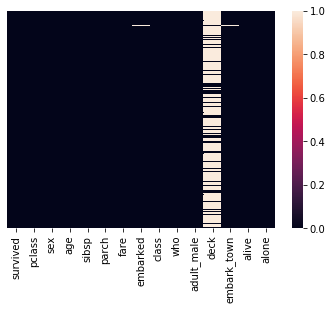

In [33]:
sns.heatmap(data.isnull(),yticklabels=False) 

In [34]:
# directly dropping deck column
data.drop(['deck'],axis=1,inplace=True)

In [40]:
sex_new=pd.get_dummies(data['sex'],drop_first=True) #replacing categorcial data with numerical value
embark_new=pd.get_dummies(data['embarked'],drop_first=True)


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [41]:
data=pd.concat([data,sex_new,embark_new],axis=1)

In [ ]:
data.drop(['sex','embarked'],axis=1,inplace=True)

In [54]:
data.drop(['class','who','adult_male','embark_town','alive','alone'],axis=1,inplace=True) # all numricals only

In [55]:
data.head(5) 

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [56]:
from sklearn.model_selection import train_test_split

In [58]:
# selecting dependent and independnt variables
#x=data.drop(['survived'])
y=data['survived'] # predicting survival
x=data.drop(['survived'],axis=1) #selecting all other than survivded

In [59]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=101 )

In [60]:
from sklearn.linear_model import LogisticRegression


In [63]:
lr=LogisticRegression(max_iter=10000)

In [64]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred=lr.predict(X_test)

In [72]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [73]:
confusion_matrix(y_test,pred)

array([[135,  19],
       [ 37,  77]], dtype=int64)